In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wandb
import scipy.interpolate


In [6]:
entity = 'andyliu'
project = 'GridNav_Reward_Shaping'

api = wandb.Api()



In [8]:
runs = api.runs(path=entity+'/' + project)

# Checking episodic returns for different reward shaping params

In [149]:
#collect data from wandb

shapes = [[] for i in range(4)]

for i, run in enumerate(runs):
    if run.state == 'finished':
        shape = run.config['env_kwargs']['reward_shaping']
        metrics = run.history()
        df = metrics[['_step', 'global_step', 'charts/episodic_length']]
        df = df.dropna()
        df.loc[:, 'ewm'] = df['charts/episodic_length'].ewm(alpha=0.01).mean()
        shapes[shape].append(df)


Text(0.5, 0, 'timesteps trained')

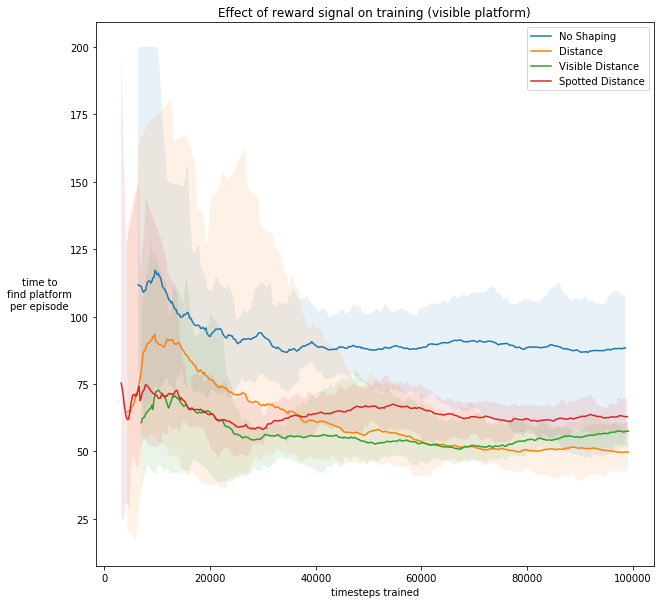

In [197]:
# fig, ax = plt.subplots(2, 2, figsize=(12, 12))
plt.figure(figsize=(10, 10))

labels = ['No Shaping', 'Distance', 'Visible Distance', 'Spotted Distance']
for i in range(4):
    # plot_x, plot_y = 
    first_xs = []
    last_xs = []
    inters = []
    for j in range(len(shapes[i])):
        df = shapes[i][j]

        first_xs.append(df.iloc[0]['global_step'])
        last_xs.append(df.iloc[-1]['global_step'])

        inter = scipy.interpolate.interp1d(df['global_step'], df['ewm'])
        inters.append(inter)

        # plt.plot(df['global_step'], df['ewm'])

    min_x = np.max(first_xs)
    max_x = np.min(last_xs)
    xs = np.arange(min_x, max_x, 200)
    ys = np.zeros((len(shapes[i]), len(xs)))

    for j in range(len(shapes[i])):
        ys[j] = inters[j](xs)

    plt.fill_between(xs, ys.min(axis=0), ys.max(axis=0), alpha=0.1)
    plt.plot(xs, ys.mean(axis=0), label=labels[i])
    
plt.legend()
plt.title('Effect of reward signal on training (visible platform)')
plt.ylabel('time to\nfind platform\nper episode', rotation=0, va='center', labelpad=30)
plt.xlabel('timesteps trained')

In [31]:
import wandb
api = wandb.Api()

# run is specified by <entity>/<project>/<run id>
run = api.run("andyliu/GridNav_Reward_Shaping/1eb8xzj6")

# save the metrics for the run to a csv file
metrics_dataframe = run.history()
metrics_dataframe.to_csv("metrics.csv")

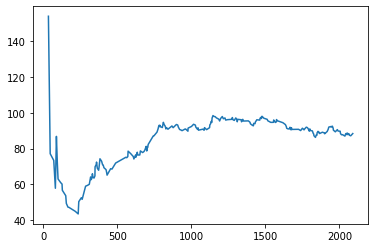

In [62]:
plt.plot(df2['_step'], df2['charts/episodic_length'].ewm(alpha=0.01).mean())